# Research Problem:

The goal of this datsaset is to findout the chance of getting admitted to foreign university based on their credentials such as GRE score, TOEFL score, Statement of purpose,Letter of recommendation ratings,Cumulative Grade Points Average(CGPA) marks,research (Yes/No).By calculating the credentrials we have to build an prediction algorithm which gives us the probabilty of getting into the US universities.

## Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )
Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

## Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

## Citation
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of 
Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. 
I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic 
and makes me a proud owner of the dataset. Keep em' coming! Thank You.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt
import missingno as msno ## missing value visaulization
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\ASUS\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expe

## Importing Dataset

In [3]:
graduate_admission= pd.read_csv("Admission_Prediction.csv")

In [4]:
## Head of the dataset
graduate_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
## Dimension of dataset

graduate_admission.shape   ## 500 rows, 9 columns

(500, 9)

In [6]:
## Info about the dataset

graduate_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
## looking into the sum of missing values in each column

graduate_admission.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

## Feature Engineering

In [8]:
## replacing the missing values of GRE Score,TOEFL Score,University Rating using mode() and mean() using fillna method

#Replcing the missing gre score with the 1st mode values
graduate_admission['GRE Score'].fillna(graduate_admission['GRE Score'].mode()[0],inplace=True)

#Replcing the missing gre score with the  mode values

graduate_admission['TOEFL Score'].fillna(graduate_admission['TOEFL Score'].mode()[0],inplace=True)

#Replcing the missing gre score with the mean values

graduate_admission['University Rating'].fillna(graduate_admission['University Rating'].mean(),inplace=True)

In [9]:
## checking missing values in dataset again

graduate_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


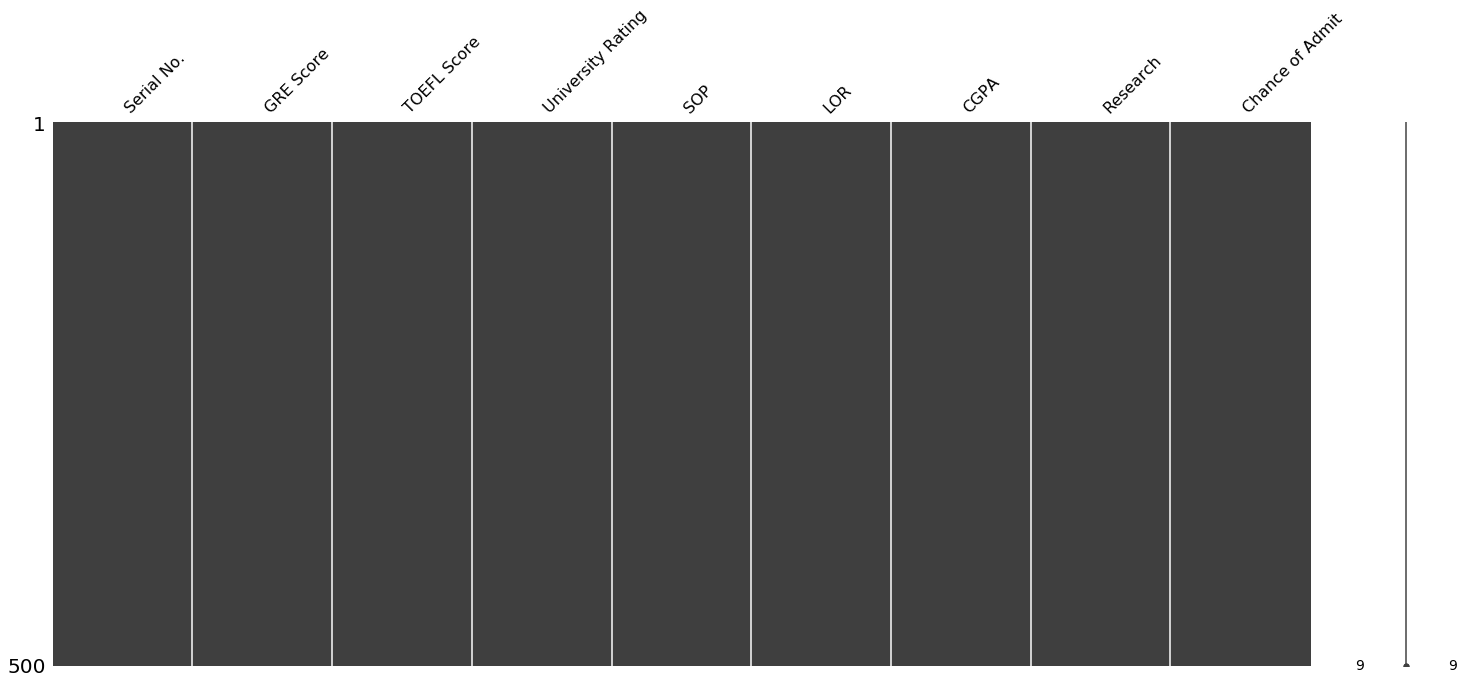

In [10]:
##checking using visual method if any missing values

msno.matrix(graduate_admission) 

#### as we can see there are no white parallel lines in each column so it means no missing values

In [11]:
## Creating the final dataset for prediction

x=graduate_admission.drop(['Serial No.','Chance of Admit'],axis=1)
y=graduate_admission['Chance of Admit']

In [12]:
## looking into the final dataset

x.head()  ## independent variables

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [13]:
y.head() ## dependent variable

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [14]:
## Correlation matrix

x_corr= x.corr()
x_corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.813091,0.620704,0.606973,0.521241,0.816190,0.545971
TOEFL Score,0.813091,1.000000,0.643663,0.644384,0.538830,0.803894,0.464678
University Rating,0.620704,0.643663,1.000000,0.712991,0.606291,0.696592,0.424429
SOP,0.606973,0.644384,0.712991,1.000000,0.663707,0.712154,0.408116
LOR,0.521241,0.538830,0.606291,0.663707,1.000000,0.637469,0.372526
CGPA,0.816190,0.803894,0.696592,0.712154,0.637469,1.000000,0.501311
Research,0.545971,0.464678,0.424429,0.408116,0.372526,0.501311,1.000000


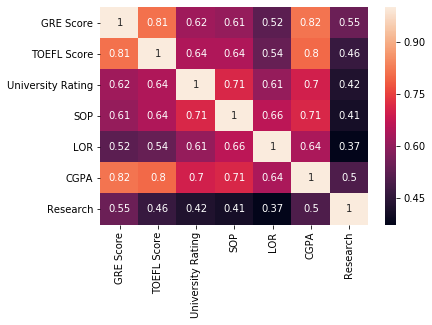

In [15]:
sns.heatmap(x_corr,annot=True)
plt.show()

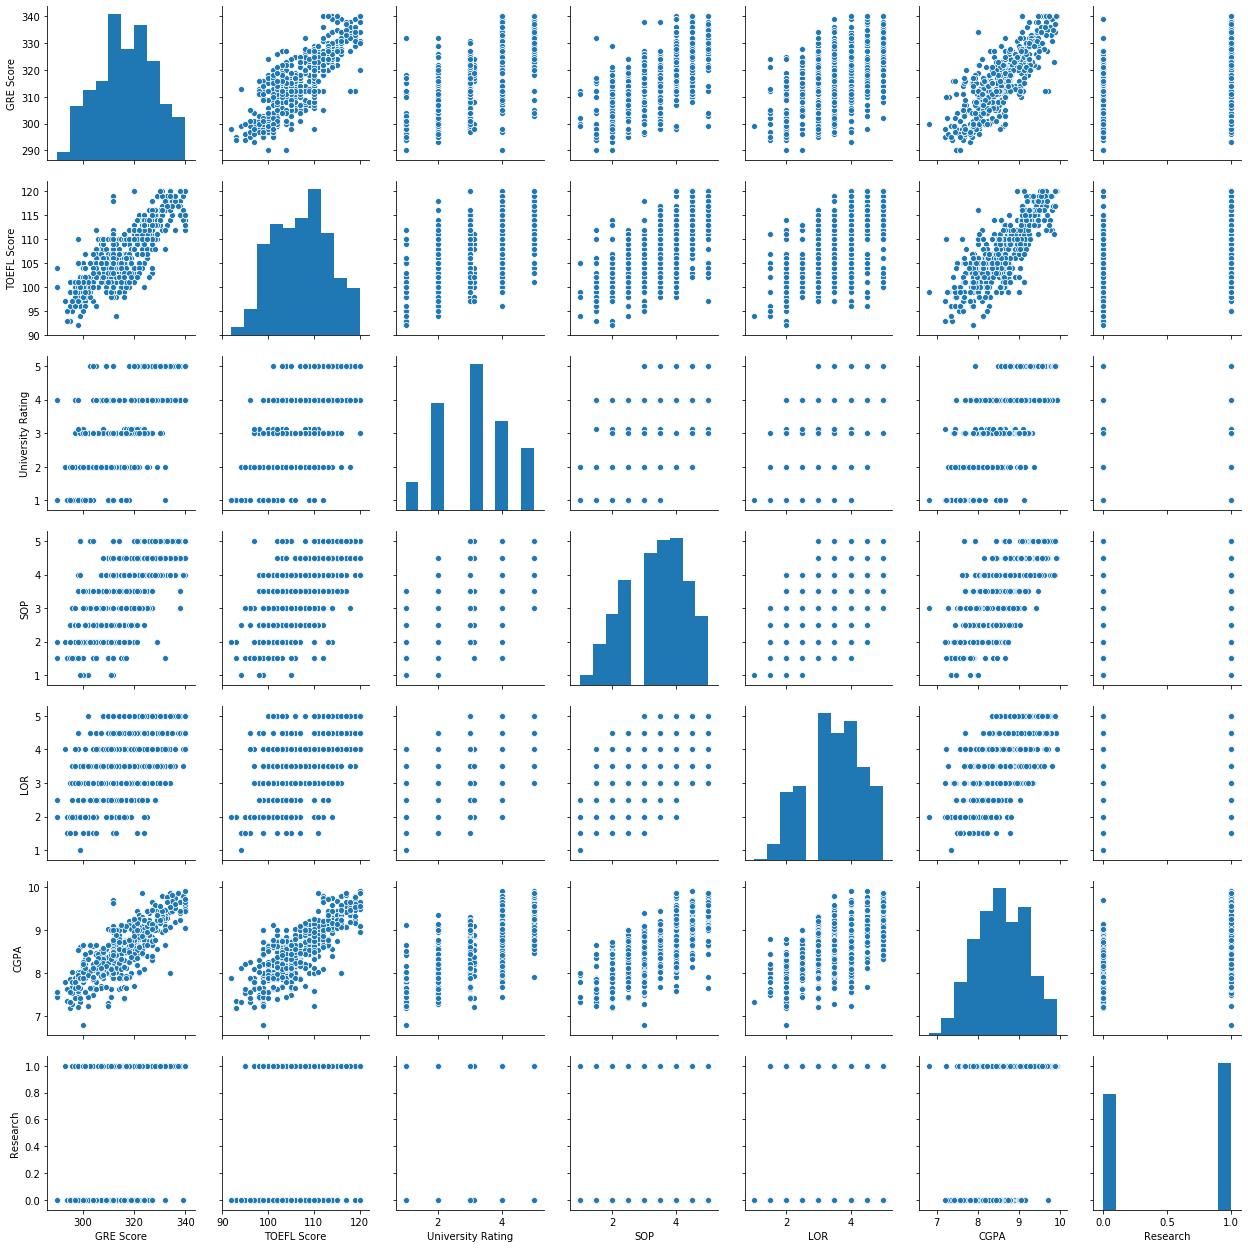

In [16]:
## relationship plots between independent variables

sns.pairplot(x)

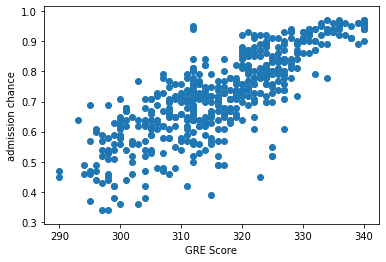

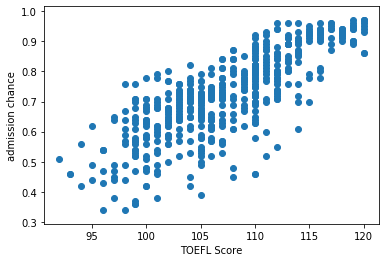

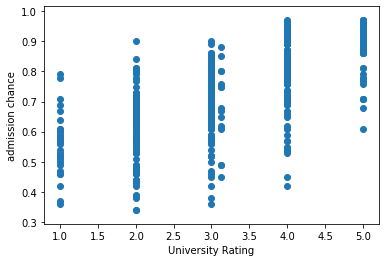

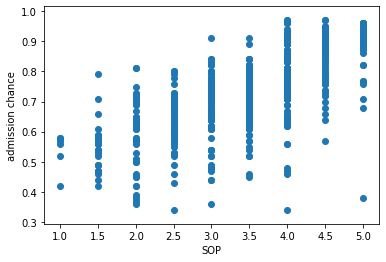

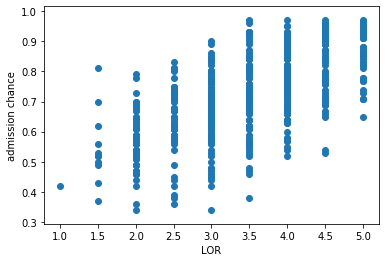

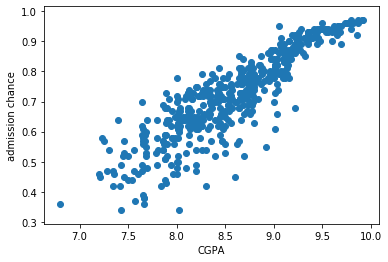

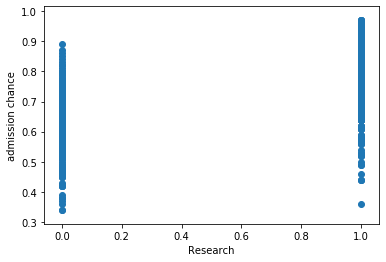

In [17]:
## relationship between  dependent and independent variable

for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel("admission chance")
    plt.show()

In [18]:
## standarising the dataset using scaling the dataset

## scaling helps the datsetto reduce the varaiation effects and to maxmise the model output

from sklearn.preprocessing import StandardScaler

scaler_feature= StandardScaler()
scaler_data=scaler_feature.fit_transform(x)


## Buidling the model

In [19]:
## splitting the dataset into train and test split
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.25,random_state=100)


In [23]:
## printout test and train dataset

print(train_x)
print("\n")
print(test_y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
219      312.0        104.0                3.0  3.5  3.5  8.42         0
391      318.0        106.0                3.0  2.0  3.0  8.65         0
375      304.0        101.0                2.0  2.0  2.5  7.66         0
19       303.0        102.0                3.0  3.5  3.0  8.50         0
229      324.0        111.0                4.0  3.0  3.0  9.01         1
..         ...          ...                ...  ...  ...   ...       ...
343      305.0        103.0                2.0  2.5  3.5  8.13         0
359      321.0        107.0                2.0  2.0  1.5  8.44         0
323      305.0        102.0                2.0  2.0  2.5  8.18         0
280      311.0        102.0                3.0  4.5  4.0  8.64         1
8        302.0        102.0                1.0  2.0  1.5  8.00         0

[375 rows x 7 columns]


69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
46     0.86
50     0.76
78

In [24]:
## fitting the data to linear regression model

reg= LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
## predict the model into test sample

reg.predict(test_x)

array([0.86065603, 0.46897837, 0.62456869, 0.44438247, 0.64430524,
       0.85855087, 0.58530629, 0.66817511, 0.81816618, 0.68254903,
       0.66694909, 0.60639052, 0.89296262, 0.7556295 , 0.63719592,
       0.50187119, 0.59103572, 0.74943621, 0.55615051, 0.71551754,
       0.89816195, 0.6131336 , 0.85054178, 0.82874682, 0.99484123,
       0.60195918, 0.68805665, 0.93865387, 0.88077042, 0.70671309,
       0.78827327, 0.85230204, 0.74988127, 0.54994014, 0.74079457,
       0.78415252, 0.79500312, 0.57767124, 0.53350637, 0.70280949,
       0.95018941, 0.59127305, 0.83576362, 0.78664022, 0.81284334,
       0.54176075, 0.594888  , 0.87793467, 0.95331071, 0.59778016,
       0.8190349 , 0.71326443, 0.80756499, 0.99215575, 0.64627549,
       0.85735154, 0.61944371, 0.89960532, 0.77255946, 0.73864264,
       0.68719725, 0.62631895, 0.47951163, 0.88431605, 0.65091817,
       0.6849263 , 0.70538968, 0.46144908, 0.84028426, 0.84581158,
       0.93002823, 0.77542099, 0.65954828, 0.83661631, 0.65283

In [26]:
## calculating the accuracy of model

from sklearn.metrics import r2_score

score= r2_score(reg.predict(test_x),test_y)
score

0.8212612570205778

In [27]:
## creating an pickle file for saving the model

filename= 'finalized_model.pickle'
pickle.dump(reg,open(filename,'wb'))